### Logistic Regression

Hypothesis Function:
 - $h_\Theta(x) = g(\Theta^Tx)$  where  $g(z) = \frac{1}{(1+e^{-z})}$ - Sigmoid Function

Cost Function: 
 - $J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$ - Binary Cross-Entropy Cost Function

Optimization Algorithm:
 - $\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ - Batch Gradient Descent

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (16, 8)

In [21]:
df = pd.read_csv("data.csv", header=None)

In [22]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [23]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [24]:
df.columns = ["Exam 1 Score","Exam 2 Score","Admitted"]

In [25]:
df.head()

,Exam 1 Score,Exam 2 Score,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Data Visualization

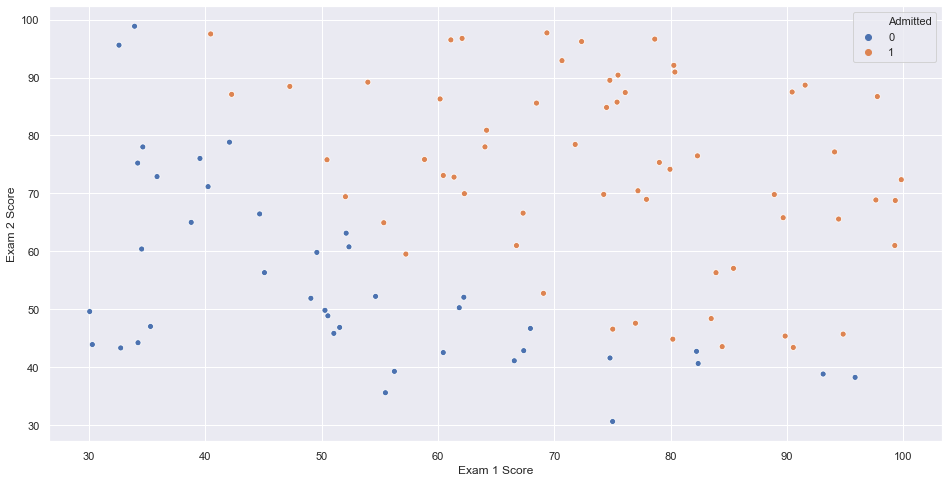

In [26]:
sns.scatterplot(data=df, x='Exam 1 Score', y='Exam 2 Score', hue='Admitted')

In [27]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [28]:
def sigmoidFunction(z):
    return 1 / (1 + np.exp(-z))

In [29]:
def computeCost(X, y, theta):
    m = len(y)
    y_hat = sigmoidFunction(np.dot(X, theta))
    error = - (y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))
    cost = (1 / m) * np.sum(error)
    return cost    

### Feature Scaling

In [30]:
def featureScale(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    return (X - X_mean) / X_std, X_mean, X_std

### Matrix of Features, Labels and Weights

In [31]:
m, n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureScale(X)
X = np.append(np.ones((m, 1)), X, axis=1)
y = y.reshape(m, 1)
theta = np.zeros((n+1, 1))

### Gradient Descent

In [32]:
def gradientDescent(X, y, theta, learningRate, numberOfIterations):
    # X - (100, 3), y - (100, 1), theta - (3, 1), y_hat - (100, 1), steepest_ascent - (3, 1)
    m = len(y)
    cost_history = []
    for i in range(numberOfIterations):
        y_hat = sigmoidFunction(np.dot(X, theta)) 
        steepest_ascent = np.dot(X.T, (y_hat - y)) * 1/m
        theta -= steepest_ascent * learningRate
        cost_history.append(computeCost(X, y, theta))
    return theta, cost_history    

In [33]:
theta, cost_history = gradientDescent(X, y, theta, 1, 500)
cost_history[-1]

0.2035279213670059

Text(0.5, 1.0, 'Cost function using Gradient Descent')

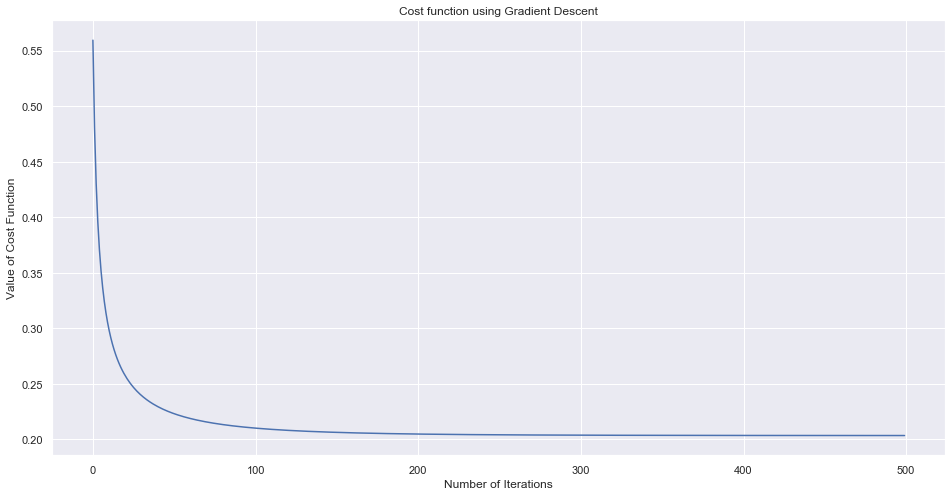

In [34]:
plt.plot(cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Cost Function")
plt.title("Cost function using Gradient Descent")

### Predictions

In [35]:
def classify(X, theta):
    y_pred = X.dot(theta)
    return y_pred > 0

In [36]:
print(f"Train Accuracy: {sum(classify(X, theta)==y)[0]} %")

Train Accuracy: 89 %


In [37]:
x_test = np.array([45, 85])
x_test = (x_test - X_mean) / X_std
x_test = np.append(np.ones((1, 1)), x_test)
print(f"Probability of being admitted with exam scores {45}, {85} is {round(sigmoidFunction(x_test.dot(theta))[0], 3)}")

Probability of being admitted with exam scores 45, 85 is 0.772


### Decision Boundary

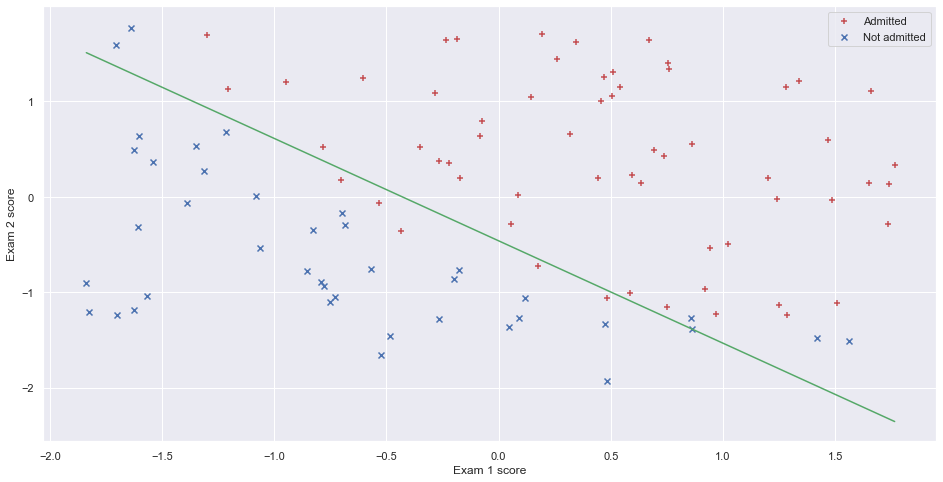

In [38]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)